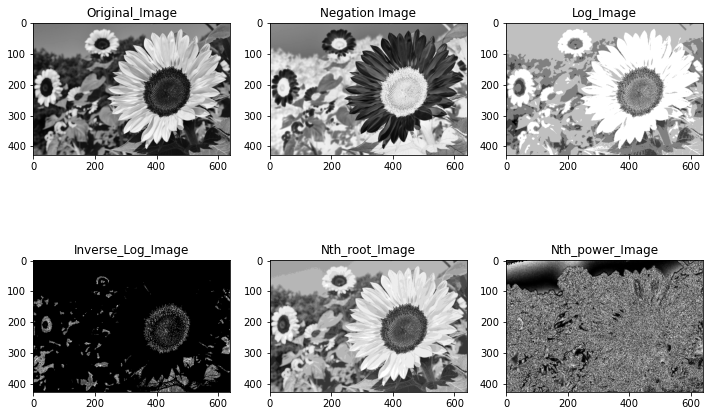

In [10]:

import matplotlib.pyplot as plt
import numpy as np
import cv2
img = cv2.imread("sunflower.jpg")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
rows,cols = gray_image.shape

negate_img=np.zeros_like(gray_image)
log_img=np.zeros_like(gray_image)
inverse_log_img=np.zeros_like(gray_image)
nth_root_img=np.zeros_like(gray_image)
nth_power_img=np.zeros_like(gray_image)

n=2
 
for i in range(rows):
    for j in range(cols):
        negate_img[i,j] = 255-gray_image[i,j]
        log_img[i,j]=np.log(1 + gray_image[i,j])
        inverse_log_img[i,j]=np.exp(gray_image[i,j]- 1)
        nth_root_img[i,j] = np.power(gray_image[i,j], 1/n)
        nth_power_img[i,j] = np.power(gray_image[i,j], n)

plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
plt.title("Original_Image")
plt.imshow(gray_image,cmap='gray')

plt.subplot(2,3,2)
plt.title('Negation Image')
plt.imshow(negate_img,cmap='gray')

plt.subplot(2,3,3)
plt.title("Log_Image")
plt.imshow(log_img,cmap='gray')

plt.subplot(2,3,4)
plt.title("Inverse_Log_Image")
plt.imshow(inverse_log_img,cmap='gray')

plt.subplot(2,3,5)
plt.title("Nth_root_Image")
plt.imshow(nth_root_img,cmap='gray')

plt.subplot(2,3,6)
plt.title("Nth_power_Image")
plt.imshow(nth_power_img,cmap='gray')

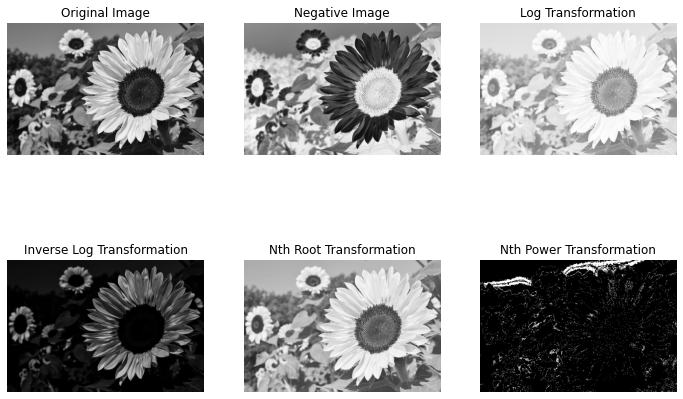

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('sunflower.jpg',0)

# 1. Negative Image
negative_image = 255 - image

# 2. Log Transformation
c = 255 / np.log(1 + np.max(image))
log_image = c * (np.log(1 + image))

# 3. Inverse Log Transformation
inverse_log_image = np.exp(image / c) - 1

# 4. Nth Root Transformation
n = 2  # Example for square root
nth_root_image = np.power(image, 1/n)

# 5. Nth Power Transformation
nth_power_image = np.power(image, n)


# Normalize images to the range 0-255 for display
log_image = np.uint8(log_image)
inverse_log_image = np.uint8(inverse_log_image)
nth_root_image = np.uint8(255 * nth_root_image / np.max(nth_root_image))
nth_power_image = np.uint8(255 * nth_power_image / np.max(nth_power_image))

# Display images
titles = ['Original Image', 'Negative Image', 'Log Transformation', 
          'Inverse Log Transformation', 'Nth Root Transformation', 'Nth Power Transformation']

images = [ image,negative_image, log_image, inverse_log_image, nth_root_image, nth_power_image]

plt.figure(figsize = (12,8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    plt.axis('off') 
plt.show()


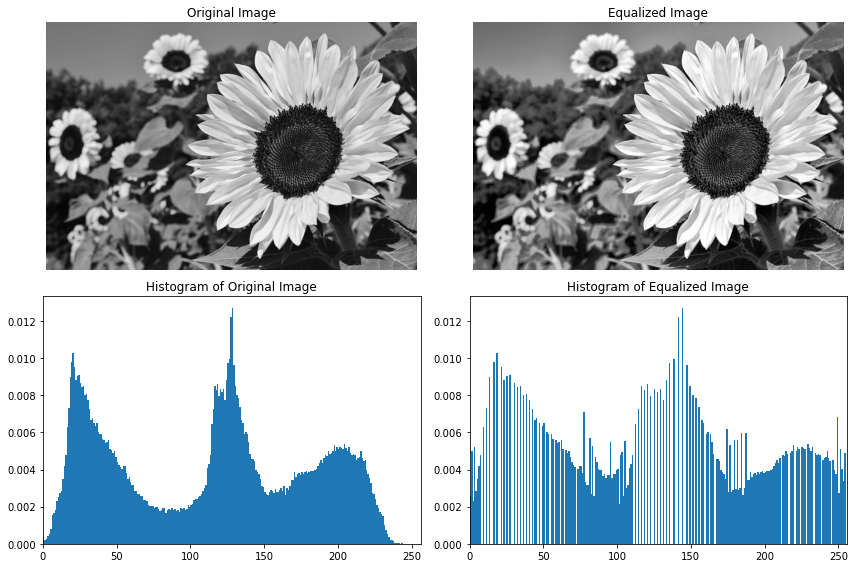

In [15]:
#histogram equalisation

import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(img):
    # Calculate the histogram
    hist = np.zeros(256)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            hist[img[i, j]] += 1

    # Normalize the histogram
    hist = hist / np.sum(hist)
   
    # Compute the cumulative distribution function (CDF)
    cdf = np.zeros(256)
    cdf[0] = hist[0]
    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + hist[i]
   
    # Normalize the CDF
    cdf = cdf * 255
    cdf = cdf.astype(np.uint8)

    # Map the original image pixels to the equalized histogram
    equalized_img = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            equalized_img[i, j] = cdf[img[i, j]]

    return equalized_img

def plot_histogram(img, title):
    plt.hist(img.ravel(), bins=256, range=(0, 256), density=True)
    plt.xlim([0, 256])
    plt.title(title)

# Load the image in grayscale
img = cv2.imread("sunflower.jpg", 0)

# Apply histogram equalization
equalized_img = histogram_equalization(img)

# Plot the original image
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')  # Hide axes

# Plot the histogram of the original image
plt.subplot(2, 2, 3)
plot_histogram(img, 'Histogram of Original Image')

# Plot the equalized image
plt.subplot(2, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_img, cmap='gray')
plt.axis('off')  # Hide axes

# Plot the histogram of the equalized image
plt.subplot(2, 2, 4)
plot_histogram(equalized_img, 'Histogram of Equalized Image')

plt.tight_layout()
plt.show()



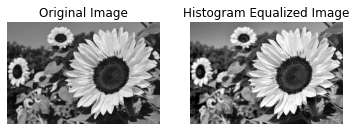

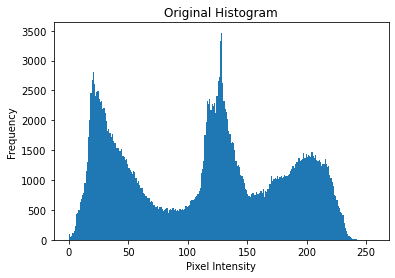

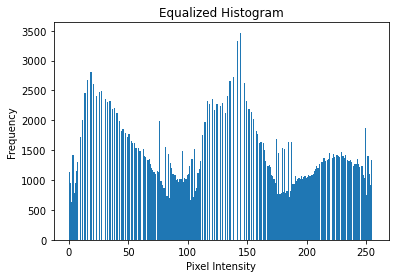

In [17]:
#histogram equalisation exact
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image in grayscale
image = cv2.imread('sunflower.jpg', cv2.IMREAD_GRAYSCALE)

# Step 1: Calculate the histogram
hist = np.zeros(256)
rows, cols = image.shape
for i in range(rows):
    for j in range(cols):
        hist[image[i, j]] += 1

# Step 2: Calculate the cumulative distribution function (CDF)
cdf = np.zeros(256)
cdf[0] = hist[0]
for i in range(1, 256):
    cdf[i] = cdf[i - 1] + hist[i]

# Step 3: Normalize the CDF
cdf_min = cdf.min()
cdf_max = cdf.max()
cdf_normalized = (cdf - cdf_min) / (cdf_max - cdf_min) * 255
cdf_normalized = cdf_normalized.astype('uint8')

# Step 4: Map the original gray levels to the equalized gray levels
equalized_image = np.zeros_like(image)
for i in range(rows):
    for j in range(cols):
        equalized_image[i, j] = cdf_normalized[image[i, j]]

# Display the original and equalized images
titles = ['Original Image', 'Histogram Equalized Image']
images = [image, equalized_image]

for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()

# Display original histogram
plt.figure()
plt.title('Original Histogram')
plt.hist(image.flatten(), bins=256, range=[0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Display equalized histogram
plt.figure()
plt.title('Equalized Histogram')
plt.hist(equalized_image.flatten(), bins=256, range=[0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()
